**Hotel Booking Dataset**




This dataset contains booking data for two types of hotels, includes data such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, and more.

[dataset](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand)

We didn't do any transformations to the data so the dataset remains the same. Explanations for each column is provided in the link for the dataset.

***Binary Variables:***
  1. is_repeated_guest - if guest rebooked the hotel
  2. hotel - there are two types of hotel (Resort Hotel or City Hotel)

***Numerical variables:***
  1. lead_time - delta time between booking and arrival to hotel
  2. adr - #lodging transactions / #nights stayed

We sample randomly (using a seed 42) 5000 rows from the dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

hotel_data = pd.read_csv('hotel_bookings.csv').sample(n=5000, random_state=42)
hotel_data.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
30946,Resort Hotel,0,203,2016,December,49,2,2,5,2,...,No Deposit,250.0,NaN,0,Transient,66.8,0,0,Check-Out,09/12/2016
40207,City Hotel,1,82,2015,July,29,16,0,3,2,...,No Deposit,9.0,NaN,0,Transient,76.5,0,0,Canceled,16/07/2015
103708,City Hotel,0,25,2016,December,53,27,0,3,3,...,No Deposit,220.0,NaN,0,Transient-Party,60.0,0,1,Check-Out,30/12/2016
85144,City Hotel,0,1,2016,March,11,9,0,1,1,...,No Deposit,9.0,NaN,0,Transient-Party,95.0,0,0,Check-Out,10/03/2016
109991,City Hotel,0,70,2017,April,16,16,2,2,2,...,No Deposit,9.0,NaN,0,Transient,108.0,0,0,Check-Out,20/04/2017


Summary on dataset given the four variables that we chose:

In [ ]:
# Define numerical and binary variables
numerical_vars = ["lead_time", "adr"]
binary_vars = ["is_repeated_guest", "hotel"]

# Summary statistics and visualizations for numerical variables
numerical_summary = hotel_data[numerical_vars].describe()
binary_summary = hotel_data["is_repeated_guest"].value_counts()
hotel_summary = hotel_data["hotel"].value_counts()
print(f'{numerical_summary}\n')
print(f'{binary_summary}\n')
print(f'{hotel_summary}\n')


         lead_time          adr
count  5000.000000  5000.000000
mean    105.707400   100.802180
std     108.574166    47.568669
min       0.000000     0.000000
25%      18.000000    68.122500
50%      70.000000    92.750000
75%     164.000000   125.000000
max     629.000000   451.500000

is_repeated_guest
0    4837
1     163
Name: count, dtype: int64

hotel
City Hotel      3264
Resort Hotel    1736
Name: count, dtype: int64



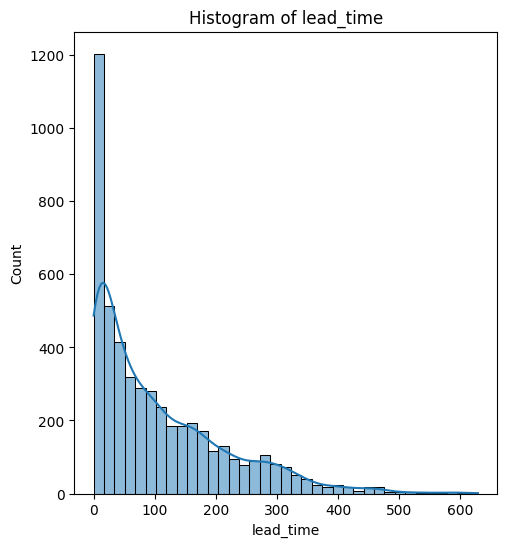

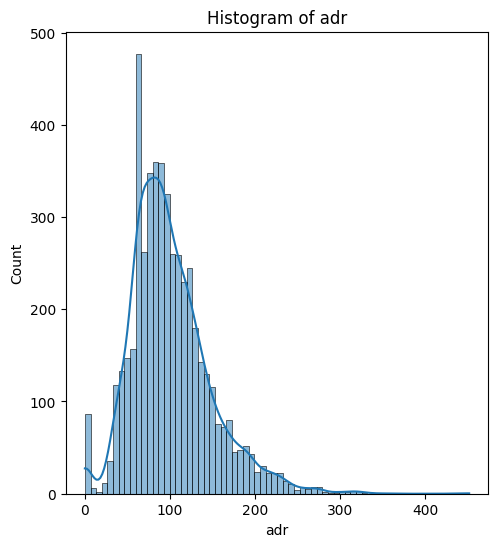

In [ ]:

# Plot histograms and boxplots for numerical variables
for var in numerical_vars:
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(hotel_data[var], kde=True)
    plt.title(f"Histogram of {var}")

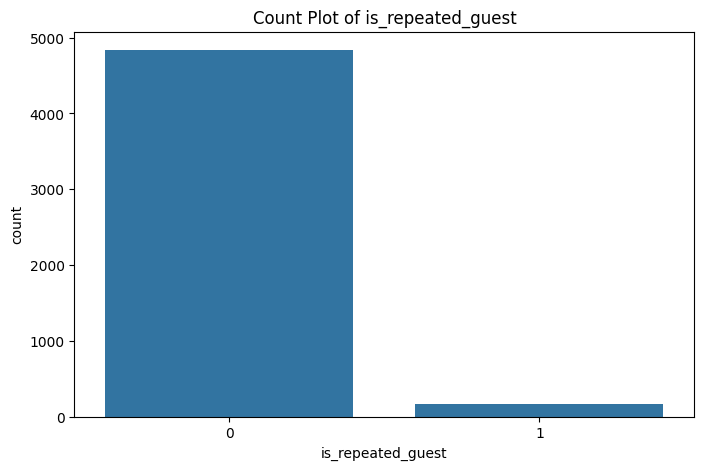

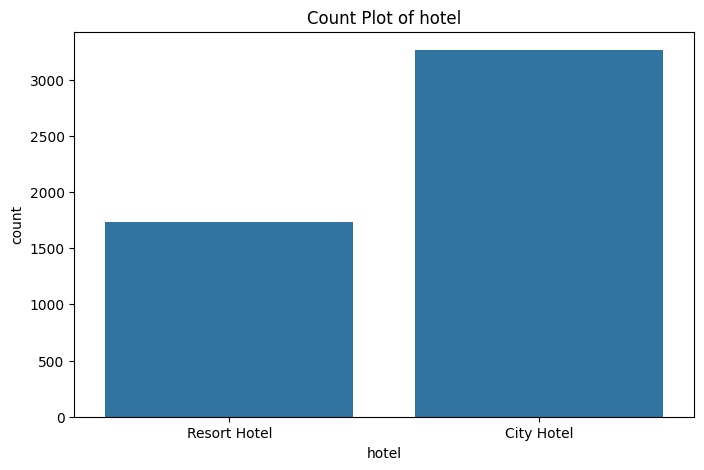

In [ ]:
# Analysis and visualizations for binary variables
binary_summary = hotel_data[binary_vars].value_counts().unstack()

# Plot count plots for binary variables
for var in binary_vars:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=hotel_data, x=var)
    plt.title(f"Count Plot of {var}")
    plt.show()


***Research questions:***
1. If the value of lead_time increases then does the adr value decrease
2. Likelyhood that given the lower that adr is, the Probability that is_repeated_guest will be 1

3. Does the adr variable get affected when we look between the resort hotel and city hotel

In [ ]:
print(hotel_data[numerical_vars + binary_vars].isnull().sum())


lead_time            0
adr                  0
is_repeated_guest    0
hotel                0
dtype: int64


Let's look at ***outliers:***

for the variable adr, we can see that around the value 75 we get an abnormal amount of ppl who pay a higher adr at that value relative to the given distribution of the graph.